<center><br><font size=10>Python for ML - HW_1</font><br>
<b>Introduction to Machine Learning</b>
<br><br>
<b>Author</b>: Ilan Vasilevsky - ilanv@mail.tau.ac.il
<br><i>Spring 2022</i></center>

# Numpy

<img src="https://numpy.org/images/logo.svg" width=100>

## Instructions
1. Write all code within the functions
2. Make sure to **return** the solution in every function
3. Don't be afraid to search the internet for help

**Import Libraries**

In [41]:
import numpy as np

## 1. Repeat question 1 from the hand-written exercise in code

### 1. prep) Create the matrix X that was given in the exercise <br> 

$X = \begin{pmatrix}
1 & 2 & 0\\
0 & 1 & 0\\
-1 & -1 & 1\\
2 & 0 & 1\\
\end{pmatrix}$
<br><br>
Complete the function `create_x()`. <br>
The function should return a 2-dimentional numpy array (matrix)

In [42]:
def create_x():
  return np.array([[1,2,0],[0,1,0],[-1,-1,1],[2,0,1]])

### 1. a) Calculate $||X_{2}||_{2}$ and $||X_{2}||_{2}^2$


Complete the function `calc_norms(X)` where X is the input matrix.<br><br> The function should return a dictionary containing the values:<br>
* norm_x2 = $||X_{2}||_{2}$<br>
* norm_x2_squared = $||X_{2}||_{2}^2$

In [43]:
def calc_norms(X):
  norm_x2=np.linalg.norm(X[2,:])
  return {'norm_x2':norm_x2,'norm_x2_squared':norm_x2**2}

Test your solution

In [44]:
X = create_x()
print(calc_norms(X))

{'norm_x2': 1.7320508075688772, 'norm_x2_squared': 2.9999999999999996}


### 1. f+g+h) Correlation Matrix 
Calculate the correlation matrix C, Then calculate the determinant and the inverse of C <br><br>
Reminder : <br>
f) $C=X^TX$ <br>
g) $det(C) = det(X^TX)$ <br>
h) inverse matrix : $C^{-1} = (X^TX)^-1 $ 
  <br><br>
Complete the function `corr_mat_atts(X)` where X is the input matrix.<br>
The function should return a **dictionary** containing the values:<br>
* C = Correlation matrix
* C_det = Determinant of C
* C_inv = inverse of C

In [45]:
def corr_mat_atts(X):
  correlation_matrix=np.matmul(np.transpose(X),X)
  return {'C':correlation_matrix,'C_det':np.linalg.det(correlation_matrix),'C_inv':np.linalg.inv(correlation_matrix)} 

In [46]:
#Test your solution
C_atts = corr_mat_atts(X)
C = C_atts['C']
detC = C_atts['C_det']
invC = C_atts['C_inv']
print(f'C: \n{C}\n')
print(f"det(C) = {detC}")
print(f"\n C^-1: \n{invC}")

C: 
[[ 6  3  1]
 [ 3  6 -1]
 [ 1 -1  2]]

det(C) = 36.0

 C^-1: 
[[ 0.30555556 -0.19444444 -0.25      ]
 [-0.19444444  0.30555556  0.25      ]
 [-0.25        0.25        0.75      ]]


## 2. Given a scalar and an 1d array, find the closest value to this scalar
Complete the function `closest_val(v,s)` , where v is an array and s is a scalar. The function should return the closest value to s, that is in array v. <br><br>
for example, given the input: v = [1,3,9] ; s=14 <br>
the function should return 9

In [47]:
#v is the 1-d array (vector) and 
def closest_val(v,s):
  return v[np.argmin(np.abs(v-s))]

In [48]:
#Test your code
v = np.array([10,14,2,7])
s = 6
print(closest_val(v,s))

7


## 3. Thresholding
Given a matrix `M` and a scalar threshold `thresh`, the function should return a new matrix with same dimensions as `M`, that contains:

-   1 where values is equal or above threshold
-   0 where values are below threshold

for example `thresh=3`, 
$M=\begin{pmatrix}
1 & 2 & 9\\
-1 & 4 & 0\\
\end{pmatrix}$
<br>
output will be:<br>
$Out=\begin{pmatrix}
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}$
<br><br>
Hint: be cautious not to overwrite the original M matrix

In [49]:
def thresh_func(M,thresh):
  return np.where(M>=thresh,1,0)

In [50]:
#Test your code
M = np.array([[1,2,9],[-1,4,0]])
print(thresh_func(M,3))

[[0 0 1]
 [0 1 0]]


## 4. Grade Checking
For a given matrix M, where each row index is a student and columns indexes are exercises:<br>
calculate for the first **n** students and range of execrcises  [**a**,**b**] (b>a): <br> 
* Average score for each exercise
* std for each exercise
* Minimal score of each **Student**
<br><br>
Example of input:
$M=\begin{pmatrix}
100 & 82 & 91\\
95 & 73 & 62\\
97 & 84 & 78\\
100 & 91 & 86\\
\end{pmatrix}$
<br>
In this matrix there are 4 students (rows) and 3 exercises (columns). <br>
The i,j element of the function is the grade of exercise j for student i<br>
for example, $M_{1,2} = 62$ : That means that student 1 got a grade of 62 for exercise 2
<br><br>
Example of the corresponding output:<br>


### Instructions
Complete the function `calc_grade_atts(grades,n,a,b)` Where: <br>
**grades** - input matrix (same as M mentioned before) <br>
**n** - first number of students to include in the calculation <br>
**a,b** - range of exercises to include in the calculation (b should be greater than a)<br>
<br><br>
The function should return a dictionary that contains the following:
- avg_ex - average grade of each exercise in relevant data
- std_ex - standart deviation of each exercise in relevant data
- min_grade - minimal grade for each student in relevant data


relevant data - first n students and exercises in range [a,b]
<br><br>
Assume the input is valid

In [51]:
def calc_grade_atts(grades,n,a,b):
    relevent_data=grades[:n,a:b+1]
    return {'avg_ex':np.mean(relevent_data,axis=0), 'std_ex':np.std(relevent_data,axis=0), 'min_grade':np.min(relevent_data,axis=1)}

In [52]:
#Test your solution
M = np.array([[100,82,91],[95,73,62],[97,84,78],[100,91,86]])
n_students = M.shape[0]
n_ex = M.shape[1]
print(calc_grade_atts(M,n_students,0,n_ex) )#analyze the full input matrix

{'avg_ex': array([98.  , 82.5 , 79.25]), 'std_ex': array([ 2.12132034,  6.42261629, 10.98578627]), 'min_grade': array([82, 62, 78, 86])}


***

# Pandas


<img src="https://pandas.pydata.org/static/img/pandas_white.svg" width=300>
<img src="https://m.media-amazon.com/images/G/01/IMDb/BG_rectangle._CB1509060989_SY230_SX307_AL_.png" width=200>

**Import Libraries** :
- Numpy as np
- Pandas as pd

In [53]:
import numpy as np
import pandas as pd

**Load IMDB data set** to **Dataframe** named df<br><br>

> path should be 'IMDB-Movie-Data.csv' if file in the same folder as notebook or 'C:\\\PATH\\\TO\\\IMDB-Movie-Data.csv' if not (note we must use double backslashes on windows to distinguish from backslash of special chars like \\n) 

In [54]:
df=pd.read_csv('IMDB-Movie-Data.csv')

## 0. Clean Up

**Change columns name** :
- 'Runtime (Minutes)' to  'Runtime_minutes' 
- 'Revenue (Millions)' to 'Revenue_in_millions'

In [55]:
df.rename(columns={'Runtime (Minutes)':'Runtime_minutes','Revenue (Millions)':'Revenue_in_millions'},inplace=True)

**Convert all column names to lower case**

for example :
column 'Runtime' to 'runtime'

In [56]:

df.columns=[col.lower() for col in df]


### 1. For the Artistic Value Of It
Find all movies that were **released between 2012 and 2014**, have a **rating above 7.8**, but made **below the median revenue.**<br>
Show **top 4 by number of votes**. <br> 

Suggestion: use `df.sort_values`

In [57]:
med=df['revenue_in_millions'].median()
cond_1=df['year']<=2014 
cond_2=df['year']>=2012
cond_3=df['rating']>7.8
cond_4=df['revenue_in_millions']<med
df.loc[cond_1 & cond_2 & cond_3 & cond_4].sort_values(by='votes',ascending=False).head(4)




,id,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_in_millions,metascore
133,55309,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
173,88261,Her,"Drama,Romance,Sci-Fi",A lonely writer develops an unlikely relations...,Spike Jonze,"Joaquin Phoenix, Amy Adams, Scarlett Johansson...",2013,126,8.0,390531,25.56,90.0
235,85035,The Perks of Being a Wallflower,"Drama,Romance",An introvert freshman is taken under the wings...,Stephen Chbosky,"Logan Lerman, Emma Watson, Ezra Miller, Paul Rudd",2012,102,8.0,377336,17.74,67.0
332,21320,Dallas Buyers Club,"Biography,Drama","In 1985 Dallas, electrician and hustler Ron Wo...",Jean-Marc Vallée,"Matthew McConaughey, Jennifer Garner, Jared Le...",2013,117,8.0,352801,27.30,84.0


### 2. Meta-metascore
Create a new rating feature that takes both the [rating](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculate) and the [metascore](https://www.metacritic.com/about-metascores).<br>

1. Ignore movies with not many raters: <br>Change `rating` and `metascore` of movies with below 100,000 votes to NaN.
2. Normalize each of the rating columns ("rating" and "metascore") to be between 0 to 1.
3. Create a new feature (new column), called "mixed_rating" to be the multiplication of the two normalized columns:
    <br>a. By using simple Arithmetic Operation.
    <br>b. By using the `apply` function.
4. Show top 5 movies with highest "mixed_rating" (show all table columns)

In [60]:
def normalize(df,col):
    return (df[col]-df[col].min())/(df[col].max()-df[col].min())
def mix_rating(row):
    return row['rating']*row['metascore']

#Ignore movies with not many raters
rating_mask=df['votes']<100000
df.loc[rating_mask,['rating','metascore']]=np.nan


# Normalize each of the rating columns
df['rating']=normalize(df,'rating')
df['metascore']=normalize(df,'metascore')

# Create a new feature (new column), called "mixed_rating"
# Arithmetic Operation
df['mixed_rating']=df['rating']*df['metascore'] 
# using the apply function
df['mixing_rating']=df.apply(mix_rating,axis=1)

# Show top 5 movies with highest "mixed_rating"
df.sort_values(by='mixed_rating',ascending=False).head(5)


,id,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_in_millions,metascore,mixed_rating,mixing_rating
230,25701,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,0.836735,498879,37.62,0.975309,0.816075,0.816075
6,10033,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,0.857143,258682,151.06,0.913580,0.783069,0.783069
54,18466,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,1.000000,1791916,533.32,0.777778,0.777778,0.777778
476,36475,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,0.897959,278103,11.28,0.864198,0.776014,0.776014
111,51629,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,0.816327,486338,56.67,0.950617,0.776014,0.776014


### 3. Making a Hit
Plot the movies revenue distribution with with 50 bins.<br>
* add a dashed red line to mark the median using the following code:<br>
`plt.gca().axvline(df['revenue_millions'].median(), color='r', linestyle='--')`<BR>
* name X axis - 'Revenue'

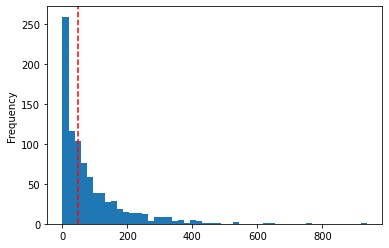

In [59]:
import matplotlib.pyplot as plt
df['revenue_in_millions'].plot.hist(x='Revenue',bins=50)
plt.gca().axvline(df['revenue_in_millions'].median(),color='r',linestyle='--')
plt.show()